# Explore SPSA params
The $c_i$ parameters are used to define the step size (a), and the gradient estimation range (c)
* $a = \frac{c_0}{(1 + i + c_4)^{c_2}}$
* $c = \frac{c_1}{(1+i)^{c_3}}$
so both have an exponential decay. 

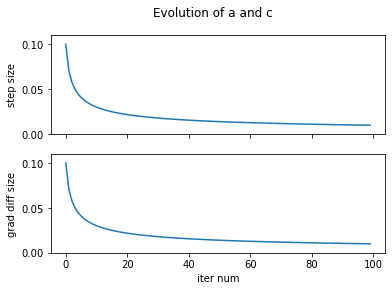

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# calculates a and c from inputs
def spsa_trajectory(maxiter = 100,
                    c0 = 0.1,
                    c1 = 0.1,
                    c2 = 0.5,
                    c3 = 0.5,
                    c4 = 0):
    _spsa_vars = [c0, c1, c2, c3, c4]
    ii = np.arange(maxiter)
    
    a_vec = _spsa_vars[0] / np.power((ii + 1 + _spsa_vars[4]), _spsa_vars[2])
    c_vec = _spsa_vars[1] / np.power((ii + 1), _spsa_vars[3])
    return a_vec, c_vec


# quick plot to show what they look like
def show_trajectory(a_vec, c_vec):
    f, ax = plt.subplots(2, 1, sharex=True, num=2, clear=True)
    f.suptitle('Evolution of a and c')
    ax[0].plot(a_vec)
    ax[0].set_ylabel('step size')
    ax[0].set_ylim([0, a_vec[0]*1.1])

    ax[1].plot(c_vec)
    ax[1].set_ylabel('grad diff size')
    ax[1].set_xlabel('iter num')
    ax[1].set_ylim([0, c_vec[0]*1.1])
    plt.show()
    
show_trajectory(*spsa_trajectory())

## A bit more systematic. 
* Know c0 and c1 are just overall scaling factors
* c4 only changes a
* Range c3 to look at c
* Range c2 and c4 to look at a

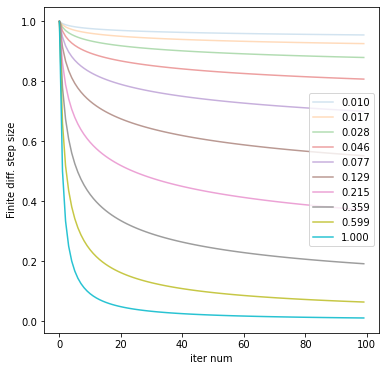

In [2]:
# define c_vec and generate the data (leave defaults)
c3_vec = np.logspace(-2, 0, 10)
data = [spsa_trajectory(c1 = 1, c3 = c3)[1] for c3 in c3_vec]

# plot the evolution for diff values
plt.figure(20, figsize = (6, 6))
for ii, dat in enumerate(data):
    alpha = (ii / len(c3_vec))*0.8 + 0.2
    plt.plot(dat, alpha = alpha, label = f'{c3_vec[ii]:.3f}')
plt.legend(loc='right')
plt.xlabel('iter num')
plt.ylabel('Finite diff. step size')
plt.show()

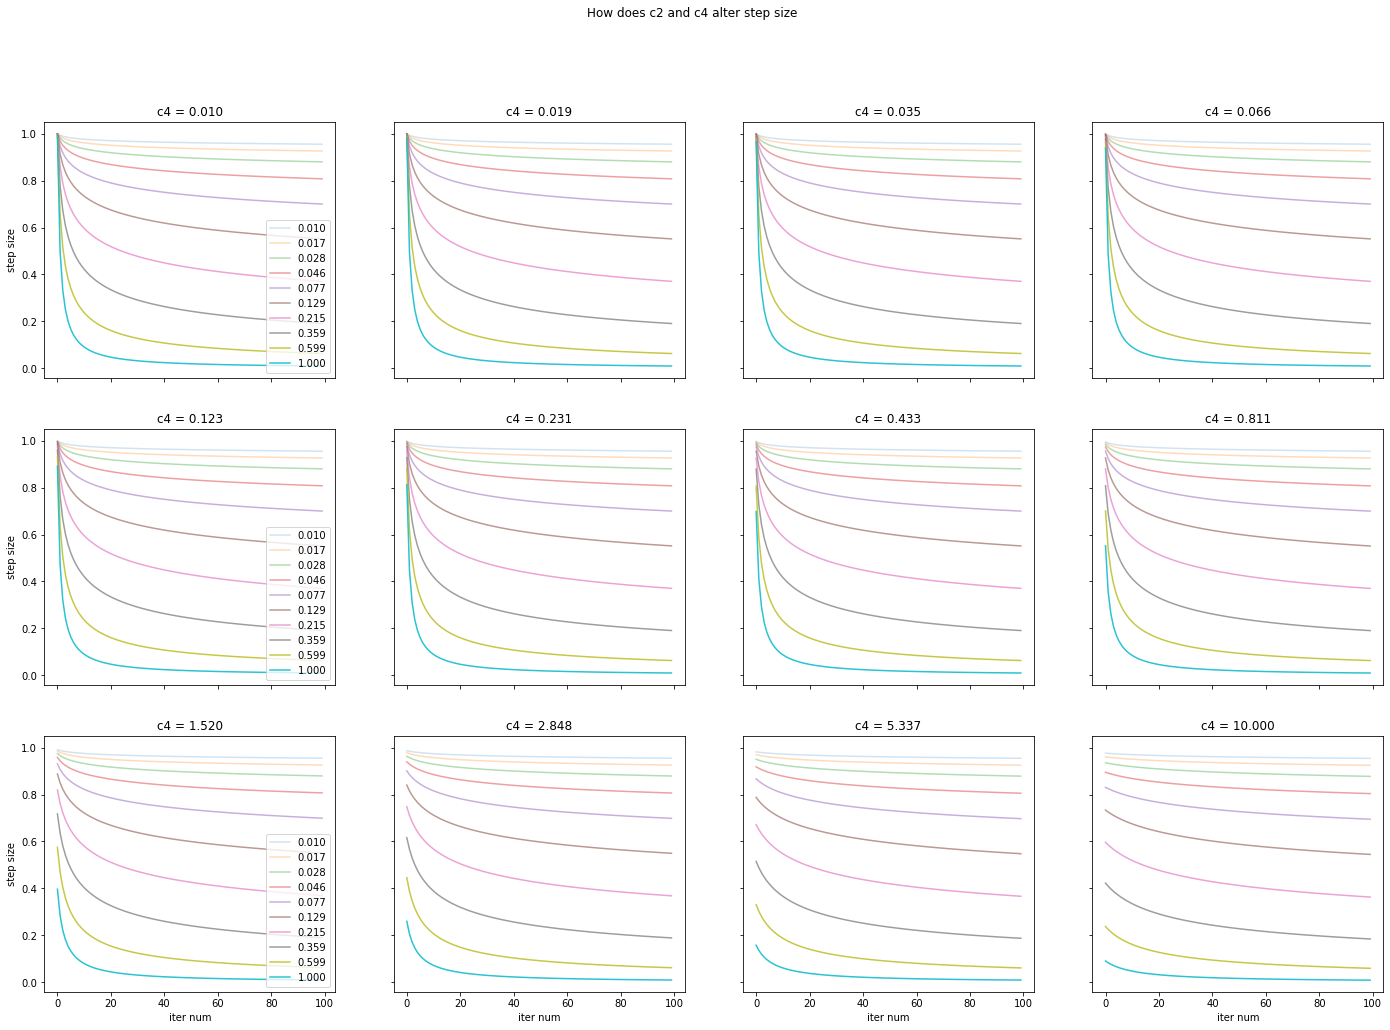

In [3]:
# look at c2 from 0 to 1 and c4 up to 10
c2_vec = np.logspace(-2, 0, 10)
c4_vec = np.logspace(-2, 1, 12)

# generate ax
f, ax = plt.subplots(3, 4, 
                     sharex=True, 
                     sharey=True, 
                     figsize=(24, 16))
ax = np.ravel(ax)

for ax_id, c4 in enumerate(c4_vec):
    data = [spsa_trajectory(c0 = 1, c4 = c4, c2 = c2)[0] for c2 in c2_vec]
    for ii, dat in enumerate(data):
        alpha = (ii / len(c2_vec))*0.8 + 0.2
        ax[ax_id].plot(dat, alpha = alpha, label = f'{c2_vec[ii]:.3f}')
    
    ax[ax_id].set_title('c4 = {}'.format(f'{c4:.3f}'))
    # deciding where to put labels so it's not too crowded
    if ax_id > 7:ax[ax_id].set_xlabel('iter num')
    if ax_id % 4 == 0: ax[ax_id].set_ylabel('step size');ax[ax_id].legend(loc='lower right')
f.suptitle('How does c2 and c4 alter step size')
plt.show()